## 1. Downloading Data

In [1]:
!kaggle datasets download -d haroon669/cats-vs-dogs-dataset-10k-cat-10k-dog-images

Dataset URL: https://www.kaggle.com/datasets/haroon669/cats-vs-dogs-dataset-10k-cat-10k-dog-images
License(s): CC0-1.0
100%|█████████████████████████████████████▉| 1.06G/1.06G [00:47<00:00, 27.2MB/s]
100%|██████████████████████████████████████| 1.06G/1.06G [00:47<00:00, 24.2MB/s]


## 2. Unzip Data

In [2]:
!unzip /kaggle/working/cats-vs-dogs-dataset-10k-cat-10k-dog-images.zip

Archive:  /kaggle/working/cats-vs-dogs-dataset-10k-cat-10k-dog-images.zip
  inflating: dogs_vs_cats/test/cats/cat.10.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10000.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10001.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10007.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10017.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10021.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10026.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10030.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10033.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10035.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10036.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10046.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10048.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10052.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10057.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10064.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10074.jpg  
  inflating: dogs_vs_cats/test/cats/cat.10086

## 3. Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
import random
import warnings
warnings.simplefilter('ignore')

In [4]:
os.listdir("/kaggle/working/dogs_vs_cats")

['train', 'test']

In [5]:
print("Dog Images", len(os.listdir("/kaggle/working/dogs_vs_cats/train/dogs")))
print("Cat Images", len(os.listdir("/kaggle/working/dogs_vs_cats/train/cats")))

Dog Images 10000
Cat Images 10000


## 4. Visualizing Data

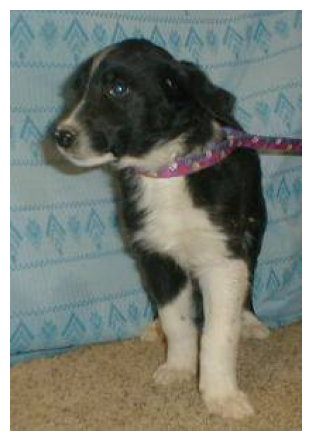

In [ ]:
dog_directory = "/kaggle/working/dogs_vs_cats/train/dogs/"
dog_name = random.sample(os.listdir(dog_directory),2)
img = os.path.join(dog_directory,dog_name[0])
image = Image.open(img)
plt.imshow(image)
plt.tight_layout()
plt.axis('off')
plt.show()

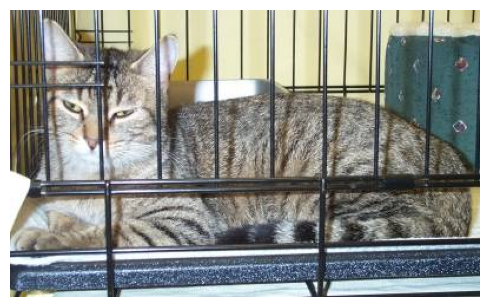

In [ ]:
cat_directory = "/kaggle/working/dogs_vs_cats/train/cats"
cat_image = random.sample(os.listdir(cat_directory),1)
plt.figure(figsize=(5,5))
img_path = os.path.join(cat_directory,cat_image[0])
image = Image.open(img_path)

plt.axis('off')
plt.tight_layout()
plt.imshow(image)
plt.show()

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2024-08-04 11:40:04.119880: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 11:40:04.119977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 11:40:04.247774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 5. Model Saving as conv_base

In [ ]:
conv_base = VGG16(weights = 'imagenet',
include_top = False, # include_top means Dense layers is not included(ann)
input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Fine Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
from keras.models import Model
num_classes = 1
x = conv_base.output
model = Sequential()
#model.add(conv_base)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(inputs=conv_base.input, outputs=x)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,02

 Total params: 19,435,841 (74.14 MB)

 Trainable params: 11,800,577 (45.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
#conv_base.trainable = False

## 7. Data Augmentation

In [ ]:
"""base_dir = "/kaggle/working/dogs_vs_cats/train"
train_datagen = ImageDataGenerator(
rescale = 1/255,
validation_split = 0.2,
horizontal_flip = True,
zoom_range = 0.2,
rotation_range = 30)"""

'base_dir = "/kaggle/working/dogs_vs_cats/train"\ntrain_datagen = ImageDataGenerator(\nrescale = 1/255,\nvalidation_split = 0.2,\nhorizontal_flip = True,\nzoom_range = 0.2,\nrotation_range = 30)'

In [ ]:
"""train_generator = train_datagen.flow_from_directory(
base_dir,
batch_size=32,
target_size = (150,150),
class_mode = 'binary')"""

"train_generator = train_datagen.flow_from_directory(\nbase_dir,\nbatch_size=32,\ntarget_size = (150,150),\nclass_mode = 'binary')"

In [ ]:
"""validation_datagen = ImageDataGenerator(
rescale = 1/255)"""

'validation_datagen = ImageDataGenerator(\nrescale = 1/255)'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
base_dir = "/kaggle/working/dogs_vs_cats/train"
# Load the data from directories
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
data_dir = "/kaggle/working/dogs_vs_cats/test"

validation_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
"""data_dir = "/kaggle/working/dogs_vs_cats/test"
validation_data = validation_datagen.flow_from_directory(
data_dir,
target_size = (150,150), batch_size=32,
class_mode = 'binary')"""

'data_dir = "/kaggle/working/dogs_vs_cats/test"\nvalidation_data = validation_datagen.flow_from_directory(\ndata_dir,\ntarget_size = (150,150), batch_size=32,\nclass_mode = \'binary\')'

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5, mode='auto', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience = 0.3, factor = 0.1, min_lr = 0.00001)

## 8. Modeling

In [21]:
model.compile(optimizer=keras.optimizers.SGD(), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator, epochs=50, validation_data = validation_generator, callbacks = [early_stopping])

Epoch 1/50
  1/625 ━━━━━━━━━━━━━━━━━━━━ 4:02:57 23s/step - accuracy: 0.3438 - loss: 0.8084

I0000 00:00:1722771643.478087     126 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722771643.503407     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.8034 - loss: 0.4023

W0000 00:00:1722771759.669817     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 214ms/step - accuracy: 0.8035 - loss: 0.4021 - val_accuracy: 0.9340 - val_loss: 0.1639


W0000 00:00:1722771776.969242     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 199ms/step - accuracy: 0.9266 - loss: 0.1825 - val_accuracy: 0.9490 - val_loss: 0.1319
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 201ms/step - accuracy: 0.9437 - loss: 0.1414 - val_accuracy: 0.9530 - val_loss: 0.1150
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 201ms/step - accuracy: 0.9512 - loss: 0.1238 - val_accuracy: 0.9582 - val_loss: 0.1065
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 200ms/step - accuracy: 0.9618 - loss: 0.1018 - val_accuracy: 0.9562 - val_loss: 0.1093
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 200ms/step - accuracy: 0.9641 - loss: 0.0931 - val_accuracy: 0.9462 - val_loss: 0.1335
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 200ms/step - accuracy: 0.9708 - loss: 0.0763 - val_accuracy: 0.9600 - val_loss: 0.0976
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 200ms/step - accuracy: 0.9756 - loss: 0.0675 - val_accuracy: 0.9472 - val_loss: 0.1389
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 199ms/step - accuracy: 0.9772 -

## 9. Model Saving

In [22]:
model.save('model.h5')